In [58]:
from pathlib import Path
import datetime
from moviepy.editor import *
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import numpy as np

font = ImageFont.truetype("arial.ttf", 40)

def make_timalepse_video_from_folder(exp_folder):
    '''Read images in exp_folder, find date created, 
    stamps it on the image and generate mp4 video 
    named as exp_folder in current folder'''
    
    exp_folder=Path(exp_folder)
    
    print(f'Processing images in folder: {exp_folder.resolve()}')
    
    p = Path(exp_folder).glob('**/*')
          
    files = [item for item in p if item.is_file() and item.suffix=='.jpg']
    times = [datetime.datetime.fromtimestamp(file.stat().st_mtime) for file in files]
    times=list(map(lambda x: x-times[0],times))

    clips=[]
    for file, time in zip(files, times):
        img=Image.open(file)
        ImageDraw.Draw(img).text((0,0), str(time),font=font)
        clip =ImageClip(np.array(img)).set_duration(0.1)
        clips.append(clip)

    concat_clip = concatenate_videoclips(clips, method="compose")
    concat_clip.write_videofile(f"{exp_folder.name}.mp4", fps=24)

In [59]:
import xml.etree.ElementTree as ET
tree = ET.parse('AOI.xml')
root = tree.getroot()

for child in root:
    print(child.tag, child.attrib)

folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}
object {}
object {}
object {}


In [60]:
exp_folder='./cf90r1-041321-80LAS-diwater/'

make_timalepse_video_from_folder(exp_folder)

Processing images in folder: /home/jovyan/work/Documents/timelapse/git/seq2video/notebooks/add_AOI_feature/cf90r1-041321-80LAS-diwater


ValueError: max() arg is an empty sequence

In [61]:
import xmltodict

with open('AOI.xml', 'r') as file:
    AOI_from_XML=xmltodict.parse(file.read())

In [62]:
AOI_dict={}
for AOI in AOI_from_XML['annotation']['object']:
    AOI_dict[AOI['name']]=AOI['bndbox']


In [64]:
for name, item in AOI_dict.items():
    print(name,item)

top1 OrderedDict([('xmin', '2346'), ('ymin', '745'), ('xmax', '2596'), ('ymax', '1004')])
top2 OrderedDict([('xmin', '2375'), ('ymin', '1895'), ('xmax', '2675'), ('ymax', '2187')])
top3 OrderedDict([('xmin', '2308'), ('ymin', '3145'), ('xmax', '2621'), ('ymax', '3425')])
top4 OrderedDict([('xmin', '2396'), ('ymin', '4379'), ('xmax', '2692'), ('ymax', '4683')])


In [31]:
AOI_dict['annotation']['object'][0]

OrderedDict([('name', 'top1'),
             ('pose', 'Unspecified'),
             ('truncated', '0'),
             ('difficult', '0'),
             ('bndbox',
              OrderedDict([('xmin', '2346'),
                           ('ymin', '745'),
                           ('xmax', '2596'),
                           ('ymax', '1004')]))])

In [38]:
img=Image.open('20210430-113421.bmp')

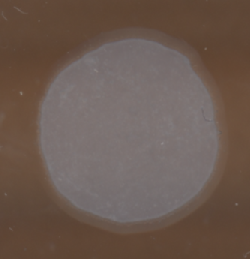

In [45]:
img.crop((int(AOI_dict['top1']['xmin']),int(AOI_dict['top1']['ymin']),int(AOI_dict['top1']['xmax']),int(AOI_dict['top1']['ymax'])))

In [44]:
(int(AOI_dict['top1']['xmin']),int(AOI_dict['top1']['ymax']),int(AOI_dict['top1']['xmax']),int(AOI_dict['top1']['ymin']))

(2346, 1004, 2596, 745)

In [54]:
from pathlib import Path
import datetime
from moviepy.editor import *
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import numpy as np
import xmltodict


font = ImageFont.truetype("arial.ttf", 40)

def make_timalepse_video_from_folder(exp_folder, xml_mask=None):
    '''Read images in exp_folder, find date created, 
    stamps it on the image and generate mp4 video 
    named as exp_folder in current folder'''
    
    exp_folder=Path(exp_folder)
    
    print(f'Processing images in folder: {exp_folder.resolve()}')
    
    p = Path(exp_folder).glob('**/*')
          
    files = [item for item in p if item.is_file() and item.suffix=='.bmp']
    times = [datetime.datetime.fromtimestamp(file.stat().st_mtime) for file in files]
    times=list(map(lambda x: x-times[0],times))

    
    if xml_mask is None:
        clips=[]
        for file, time in zip(files, times):
            img=Image.open(file)
            ImageDraw.Draw(img).text((0,0), str(time),font=font)
            clip =ImageClip(np.array(img)).set_duration(0.1)
            clips.append(clip)

        concat_clip = concatenate_videoclips(clips, method="compose")
        concat_clip.write_videofile(f"{exp_folder.name}.mp4", fps=24)
    
    else:
        with open(xml_mask, 'r') as file:
            AOI_from_XML=xmltodict.parse(file.read())
        AOI_dict={}
        for AOI in AOI_from_XML['annotation']['object']:
            AOI_dict[AOI['name']]=AOI['bndbox']
        
        for AOI_name, AOI in AOI_dict.items():
            
            clips=[]
            for file, time in zip(files, times):
                img=Image.open(file).crop((int(AOI['xmin']),int(AOI['ymin']),int(AOI['xmax']),int(AOI['ymax'])))
                ImageDraw.Draw(img).text((0,0), str(time),font=font)
                clip =ImageClip(np.array(img)).set_duration(0.1)
                clips.append(clip)

            concat_clip = concatenate_videoclips(clips, method="compose")
            concat_clip.write_videofile(f"{AOI_name}_{exp_folder.name}.mp4", fps=24)

In [55]:
make_timalepse_video_from_folder('test_folder/', xml_mask='AOI.xml')

Processing images in folder: /home/jovyan/work/Documents/timelapse/git/seq2video/notebooks/add_AOI_feature/test_folder


Moviepy - Building video top1_test_folder.mp4.
Moviepy - Writing video top1_test_folder.mp4

Moviepy - Done !
Moviepy - video ready top1_test_folder.mp4


Moviepy - Building video top2_test_folder.mp4.
Moviepy - Writing video top2_test_folder.mp4

Moviepy - Done !
Moviepy - video ready top2_test_folder.mp4


Moviepy - Building video top3_test_folder.mp4.
Moviepy - Writing video top3_test_folder.mp4

Moviepy - Done !
Moviepy - video ready top3_test_folder.mp4


Moviepy - Building video top4_test_folder.mp4.
Moviepy - Writing video top4_test_folder.mp4

Moviepy - Done !
Moviepy - video ready top4_test_folder.mp4


In [57]:
import click

from pathlib import Path
import datetime
from moviepy.editor import *
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import numpy as np

font = ImageFont.truetype("arial.ttf", 40)

@click.command()
@click.option('--exp_folder', default='./', help='Path to experiment folder with images. Exp_folder will be also used to name the timelapse video')
@click.option('--xml_mask', default=None, help='Path to xml file with 1 or multiple masks generated by labelimg ')

def main(exp_folder, xml_mask=None):
    '''Read images in exp_folder, finds date created, 
    stamps it on the image and generate mp4 video 
    named as exp_folder in current folder
    
    Added parameter xml_mask'''
    
    exp_folder=Path(exp_folder)
    
    print(f'Processing images in folder: {exp_folder.resolve()}')
    
    p = Path(exp_folder).glob('**/*')
          
    files = [item for item in p if item.is_file() and item.suffix=='.jpg']
    times = [datetime.datetime.fromtimestamp(file.stat().st_mtime) for file in files]
    times=list(map(lambda x: x-times[0],times))


    if xml_mask is None:
        clips=[]
        for file, time in zip(files, times):
            img=Image.open(file)
            ImageDraw.Draw(img).text((0,0), str(time).split('.')[0],font=font)
            clip =ImageClip(np.array(img)).set_duration(0.1)
            clips.append(clip)

        concat_clip = concatenate_videoclips(clips, method="compose")
        concat_clip.write_videofile(f"{exp_folder.name}.mp4", fps=24)
    else:
        with open(xml_mask, 'r') as file:
            AOI_from_XML=xmltodict.parse(file.read())
        AOI_dict={}
        for AOI in AOI_from_XML['annotation']['object']:
            AOI_dict[AOI['name']]=AOI['bndbox']
        
        for AOI_name, AOI in AOI_dict.items():
            
            clips=[]
            for file, time in zip(files, times):
                img=Image.open(file).crop((int(AOI['xmin']),int(AOI['ymin']),int(AOI['xmax']),int(AOI['ymax'])))
                ImageDraw.Draw(img).text((0,0), str(time).split('.')[0],font=font)
                clip =ImageClip(np.array(img)).set_duration(0.1)
                clips.append(clip)

            concat_clip = concatenate_videoclips(clips, method="compose")
            concat_clip.write_videofile(f"{AOI_name}_{exp_folder.name}.mp4", fps=24)

# if __name__ == '__main__':
#     sys.exit(main())
